In [72]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 1. 데이터 읽기

In [73]:
launch_data = pd.read_csv('data/RocketLaunchDataCSV.csv')
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,04-Dec-58,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26,Cloudy,NaN
1,NaN,05-Dec-58,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26,Cloudy,NaN
2,Pioneer 3,06-Dec-58,1:45,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25,Cloudy,NaN
3,NaN,07-Dec-58,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25,Partly Cloudy,NaN
4,NaN,08-Dec-58,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24,Partly Cloudy,NaN


# 2. 데이터 탐색

In [74]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          60 non-null     object 
 1   Date                          300 non-null    object 
 2   Time (East Coast)             59 non-null     object 
 3   Location                      300 non-null    object 
 4   Crewed or Uncrewed            60 non-null     object 
 5   Launched?                     60 non-null     object 
 6   High Temp                     299 non-null    float64
 7   Low Temp                      299 non-null    float64
 8   Ave Temp                      299 non-null    float64
 9   Temp at Launch Time           59 non-null     float64
 10  Hist High Temp                299 non-null    float64
 11  Hist Low Temp                 299 non-null    float64
 12  Hist Ave Temp                 299 non-null    float64
 13  Perci

In [75]:
# 데이터 통계 요약 확인
launch_data.describe()

,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Hist Ave Sea Level Pressure
count,299.000000,299.000000,299.000000,59.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,59.000000,0.0,0.0,0.0
mean,81.394649,38.745819,69.747124,75.101695,81.852843,62.872910,72.389900,0.063043,0.413478,16.842809,12.929766,10.593220,NaN,NaN,NaN
std,9.026700,33.423090,10.867407,10.471134,6.860432,8.806109,7.825282,0.211995,4.676693,4.701710,6.044445,4.672438,NaN,NaN,NaN
min,51.000000,0.000000,29.040000,50.000000,71.000000,49.000000,60.000000,0.000000,0.060000,8.000000,7.000000,2.000000,NaN,NaN,NaN
25%,77.000000,0.000000,63.050000,70.000000,75.000000,55.000000,65.000000,0.000000,0.080000,14.000000,10.000000,7.000000,NaN,NaN,NaN
50%,82.000000,51.000000,71.610000,77.000000,82.000000,64.000000,72.000000,0.000000,0.110000,16.000000,10.000000,10.000000,NaN,NaN,NaN
75%,88.000000,72.000000,78.530000,81.500000,88.000000,73.000000,80.000000,0.000000,0.200000,18.000000,15.000000,12.500000,NaN,NaN,NaN
max,99.000000,83.000000,90.790000,98.000000,91.000000,79.000000,82.000000,1.800000,81.000000,60.000000,80.000000,26.000000,NaN,NaN,NaN


In [76]:
# 결측치 확인
launch_data.isnull().sum()

Name                            240
Date                              0
Time (East Coast)               241
Location                          0
Crewed or Uncrewed              240
Launched?                       240
High Temp                         1
Low Temp                          1
Ave Temp                          1
Temp at Launch Time             241
Hist High Temp                    1
Hist Low Temp                     1
Hist Ave Temp                     1
Percipitation at Launch Time      1
Hist Ave Percipitation            1
Wind Direction                    1
Max Wind Speed                    1
Visibility                        1
Wind Speed at Launch Time       241
Hist Ave Max Wind Speed         300
Hist Ave Visibility             300
Sea Level Pressure                1
Hist Ave Sea Level Pressure     300
Day Length                        2
Condition                         2
Notes                           297
dtype: int64

# 데이터 전처리
1. 결측치 처리
2. 범주형 데이터 인코딩
3. 특징 스케일링

In [77]:
launch_data['Launched?'] = launch_data['Launched?'].fillna('N')
launch_data['Crewed or Uncrewed'] = launch_data['Crewed or Uncrewed'].fillna('Uncrewed')
launch_data['Wind Direction'] = launch_data['Wind Direction'].fillna('Unknown')
launch_data['Condition'] = launch_data['Condition'].fillna('Fair')
launch_data.fillna(0, inplace=True)
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,04-Dec-58,0,Cape Canaveral,Uncrewed,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26,Cloudy,0
1,0,05-Dec-58,0,Cape Canaveral,Uncrewed,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26,Cloudy,0
2,Pioneer 3,06-Dec-58,1:45,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25,Cloudy,0
3,0,07-Dec-58,0,Cape Canaveral,Uncrewed,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25,Partly Cloudy,0
4,0,08-Dec-58,0,Cape Canaveral,Uncrewed,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24,Partly Cloudy,0


In [78]:
from sklearn import preprocessing

In [79]:
label_encoder = preprocessing.LabelEncoder()

launch_data['Crewed or Uncrewed'] = label_encoder.fit_transform(launch_data['Crewed or Uncrewed'])
launch_data['Wind Direction'] = label_encoder.fit_transform(launch_data['Wind Direction'])
launch_data['Condition'] = label_encoder.fit_transform(launch_data['Condition'])

In [80]:
y = launch_data['Launched?']

In [81]:
launch_data.columns

Index(['Name', 'Date', 'Time (East Coast)', 'Location', 'Crewed or Uncrewed',
       'Launched?', 'High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Wind Direction', 'Max Wind Speed', 'Visibility',
       'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
       'Hist Ave Visibility', 'Sea Level Pressure',
       'Hist Ave Sea Level Pressure', 'Day Length', 'Condition', 'Notes'],
      dtype='object')

In [82]:
launch_data.drop(['Name', 'Date', 'Time (East Coast)', 'Location', 'Launched?', 'Hist Ave Sea Level Pressure', 'Sea Level Pressure', 'Day Length', 'Notes', \
                  'Hist Ave Visibility', 'Hist Ave Max Wind Speed'], axis=1, inplace=True)
x = launch_data

In [83]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crewed or Uncrewed            300 non-null    int64  
 1   High Temp                     300 non-null    float64
 2   Low Temp                      300 non-null    float64
 3   Ave Temp                      300 non-null    float64
 4   Temp at Launch Time           300 non-null    float64
 5   Hist High Temp                300 non-null    float64
 6   Hist Low Temp                 300 non-null    float64
 7   Hist Ave Temp                 300 non-null    float64
 8   Percipitation at Launch Time  300 non-null    float64
 9   Hist Ave Percipitation        300 non-null    float64
 10  Wind Direction                300 non-null    int64  
 11  Max Wind Speed                300 non-null    float64
 12  Visibility                    300 non-null    float64
 13  Wind 

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [85]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth = 5)
tree_model

DecisionTreeClassifier(max_depth=5, random_state=0)

In [86]:
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [88]:
len(x_train), len(x_test), len(y_train), len(y_test)

(240, 60, 240, 60)

In [89]:
tree_model.fit(x_test, y_test)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [90]:
y_pred = tree_model.predict(x_test)
y_pred

array(['N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N',
       'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N',
       'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N'], dtype=object)

In [91]:
tree_model.score(x_test, y_test)

1.0

In [92]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       1.00      1.00      1.00        52
           Y       1.00      1.00      1.00         8

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


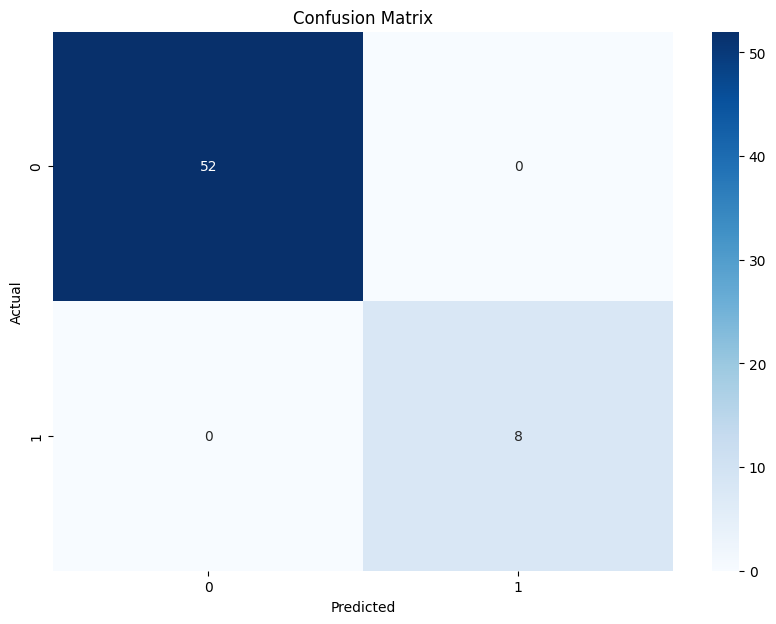

In [97]:
cm1 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 로지스틱 회귀

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lgr_model = LogisticRegression()
lgr_model.fit(x_train, y_train)

y_pred = lgr_model.predict(x_test)

y_pred

c:\Users\chch4\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N',
       'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N'], dtype=object)